**1) Faça um agrupamento de dados com as colunas "Estado" e "Nível 1 - Setor", obtendo a soma de emissão e armazenando o resultado em uma tabela.

2) Utilizando a tabela construída na atividade 1, selecione os dados referentes à "Energia" do índice "Nível 1 - Setor".

3) Utilizando a tabela construída na atividade 1, encontre a atividade econômica com valor máximo de emissão do Estado de Minas Gerais

4) Obtenha uma tabela contendo a atividade econômica com máxima emissão para cada Estado.

5) Obtenha uma tabela contendo o Estado com máxima emissão para cada atividade econômica.**

In [51]:
import pandas as pd
from IPython.display import display


In [52]:
data_frame = pd.read_excel('/content/drive/MyDrive/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name='GEE Estados')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [53]:
data_frame.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [54]:
dados_invalidos = ['Remoção', 'Remoção NCI', 'Emissão NCI', 'Bunker' ]
df_atualizado = data_frame[~data_frame['Emissão / Remoção / Bunker'].isin(dados_invalidos)]#A função "isin" faz a filtragem dos dados com base na lista que eu criei
df_atualizado['Emissão / Remoção / Bunker'].unique()

array(['Emissão'], dtype=object)

In [55]:
colunas_info = list(df_atualizado.loc[:, 'Nível 1 - Setor':'Produto'].columns)
lista_anos = df_atualizado.loc[:, 1970:2021].columns
df_atualizado.melt(id_vars = colunas_info, value_vars = lista_anos, var_name = 'Anos', value_name = 'Emissão')


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Anos,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [56]:
emissoes_por_ano = df_atualizado.melt(id_vars = colunas_info, value_vars = lista_anos, var_name = 'Anos', value_name = 'Emissão')


In [57]:
tabela = emissoes_por_ano.groupby(['Estado', 'Nível 1 - Setor'])['Emissão'].sum().sort_values(ascending=False)
tabela

Estado  Nível 1 - Setor                   
PA      Mudança de Uso da Terra e Floresta    9.662237e+10
MT      Mudança de Uso da Terra e Floresta    8.670222e+10
RO      Mudança de Uso da Terra e Floresta    3.395949e+10
MA      Mudança de Uso da Terra e Floresta    2.278021e+10
SP      Energia                               2.214979e+10
                                                  ...     
AC      Resíduos                              2.928323e+07
PI      Processos Industriais                 2.691140e+07
TO      Processos Industriais                 2.613905e+07
RR      Resíduos                              2.437322e+07
RO      Processos Industriais                 1.627021e+07
Name: Emissão, Length: 132, dtype: float64

In [58]:
tabela_df = tabela.reset_index()
tabela_df.head()

,Estado,Nível 1 - Setor,Emissão
0,PA,Mudança de Uso da Terra e Floresta,9.662237e+10
1,MT,Mudança de Uso da Terra e Floresta,8.670222e+10
2,RO,Mudança de Uso da Terra e Floresta,3.395949e+10
3,MA,Mudança de Uso da Terra e Floresta,2.278021e+10
4,SP,Energia,2.214979e+10


In [59]:
tabela_df[tabela_df['Nível 1 - Setor'] == 'Energia']
#tabela_df.xs('Energia', level = 1)

,Estado,Nível 1 - Setor,Emissão
4,SP,Energia,2.214979e+10
15,MG,Energia,9.663844e+09
17,RJ,Energia,9.151787e+09
25,RS,Energia,5.901596e+09
28,PR,Energia,5.502734e+09
29,BA,Energia,4.801368e+09
32,SC,Energia,4.328366e+09
40,GO,Energia,2.761709e+09
41,PA,Energia,2.730706e+09
44,MT,Energia,2.296983e+09


3

In [60]:
table = emissoes_por_ano[emissoes_por_ano['Estado'] == 'MG'].groupby('Atividade Econômica')['Emissão'].max()
table

Atividade Econômica
AGR           3.234533e+06
AGROPEC       2.892606e+07
CIM           8.906538e+06
COM           1.378221e+05
ENE_ELET      9.469245e+05
MET           1.509923e+07
OUTRA_IND     3.502271e+06
PEC           2.982165e+07
PROD_COMB     7.362497e+05
PUB           2.400648e+05
RES           1.866044e+06
SANEAMENTO    4.682671e+06
TRAN_CARGA    1.099296e+07
TRAN_PASS     7.059522e+06
Name: Emissão, dtype: float64

In [61]:
table.reset_index()

,Atividade Econômica,Emissão
0,AGR,3.234533e+06
1,AGROPEC,2.892606e+07
2,CIM,8.906538e+06
3,COM,1.378221e+05
4,ENE_ELET,9.469245e+05
5,MET,1.509923e+07
6,OUTRA_IND,3.502271e+06
7,PEC,2.982165e+07
8,PROD_COMB,7.362497e+05
9,PUB,2.400648e+05


4

In [62]:
grupo = emissoes_por_ano.groupby(['Estado', 'Nível 1 - Setor'])['Emissão'].sum().reset_index()
max_emissao = grupo.loc[grupo.groupby('Estado')['Emissão'].idxmax()].reset_index(drop=True).sort_values('Emissão', ascending=False)
max_emissao

,Estado,Nível 1 - Setor,Emissão
13,PA,Mudança de Uso da Terra e Floresta,9.662237e+10
12,MT,Mudança de Uso da Terra e Floresta,8.670222e+10
20,RO,Mudança de Uso da Terra e Floresta,3.395949e+10
9,MA,Mudança de Uso da Terra e Floresta,2.278021e+10
25,SP,Energia,2.214979e+10
2,AM,Mudança de Uso da Terra e Floresta,1.549303e+10
10,MG,Agropecuária,1.445325e+10
22,RS,Agropecuária,1.239938e+10
8,GO,Agropecuária,1.187803e+10
4,BA,Mudança de Uso da Terra e Floresta,1.121511e+10


5

In [63]:
emissoes_estados_setor = emissoes_por_ano.groupby(['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()
emissoes_estados_setor.groupby(level = 1).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(MG, Agropecuária)"
Energia,"(SP, Energia)"
Mudança de Uso da Terra e Floresta,"(PA, Mudança de Uso da Terra e Floresta)"
Processos Industriais,"(MG, Processos Industriais)"
Resíduos,"(SP, Resíduos )"


In [64]:
populacao_estados = pd.read_excel('/content/drive/MyDrive/POP2022_Municipios.xls', header = 1, skipfooter = 34)
populacao_estados.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237


In [65]:
#pop_estados['POPULAÇÃO'].astype(int)
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [66]:
populacao_estados = populacao_estados.assign(populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
                                             populacao = lambda x: x.loc[:,'populacao_sem_parenteses']).replace('\.', '', regex = True)

populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461748(1),461748,461748
74,AM,13,29,Alvarães,15916(2),15916,15916
81,AM,13,409,Barcelos,18399(3),18399,18399
83,AM,13,607,Benjamin Constant,37436(4),37436,37436
87,AM,13,805,Borba,33209(5),33209,33209
88,AM,13,839,Caapiranga,13851(6),13851,13851
97,AM,13,1605,Fonte Boa,27692(7),27692,27692
98,AM,13,1654,Guajará,13809(8),13809,13809
99,AM,13,1704,Humaitá,59504(9),59504,59504
103,AM,13,1951,Itamarati,10783(10),10783,10783


In [67]:
populacao_estados = populacao_estados.astype({'populacao': int})

In [81]:
populacao_certa = populacao_estados.groupby('UF')['populacao'].sum(numeric_only=True).reset_index()
populacao_certa

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


In [69]:
emissao_estados = emissoes_por_ano[emissoes_por_ano['Anos'] == 2021].groupby('Estado')['Emissão'].sum().reset_index()
emissao_estados

,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


juntando tabelas

In [82]:
dados_agrupadosC = pd.merge(emissao_estados, populacao_certa, left_on = 'Estado', right_on = 'UF')
dados_agrupadosC.head()

,Estado,Emissão,UF,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023


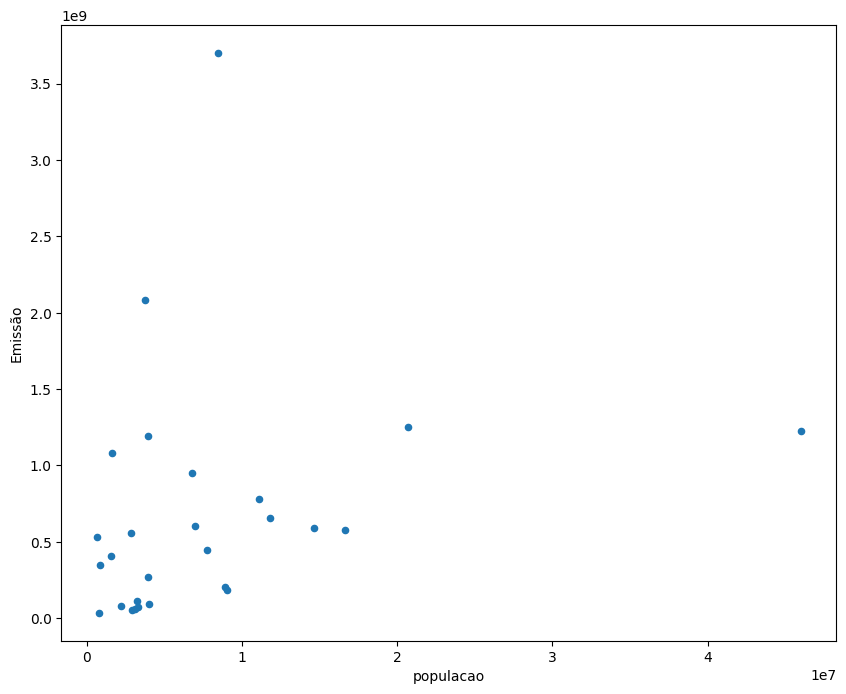

In [84]:
dados_agrupadosC.plot(x = 'populacao', y = 'Emissão', kind = 'scatter', figsize = (10, 8));

In [85]:
dados_concat = pd.concat([emissao_estados, populacao_certa], axis = 1)
dados_concat.head()
#se axis fosse igual a 0 a concatenação seria vertical

,Estado,Emissão,UF,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023


In [86]:
import plotly.express as px

In [89]:
px.scatter(dados_concat, x = 'populacao', y = 'Emissão', text = 'Estado', opacity = 0)

In [91]:
dados_concat = dados_concat.assign(emissao_percapta = dados_concat['Emissão'] / dados_concat['populacao']).sort_values('emissao_percapta', ascending = False)
dados_concat

,Estado,Emissão,UF,populacao,emissao_percapta
21,RR,5.282071e+08,RR,634805,832.077694
20,RO,1.083515e+09,RO,1616379,670.334662
12,MT,2.081610e+09,MT,3784239,550.073647
13,PA,3.701684e+09,PA,8442962,438.434230
0,AC,3.505471e+08,AC,829780,422.457928
2,AM,1.189649e+09,AM,3952262,301.004463
26,TO,4.082159e+08,TO,1584306,257.662300
11,MS,5.551278e+08,MS,2833742,195.899220
9,MA,9.476324e+08,MA,6800605,139.345312
8,GO,6.008081e+08,GO,6950976,86.435075


In [93]:
px.bar(dados_concat, x = 'Estado', y = 'emissao_percapta')

In [94]:
px.scatter(dados_concat, x = 'populacao', y = 'Emissão', text = 'Estado', size = 'emissao_percapta')